In [7]:
import torch
import torchvision
from torchvision import datasets, transforms, models
from PIL import Image
import matplotlib.pyplot as plt
from helpers import get_masks,\
                    display_image,\
                    instance_segmentation_plot,\
                    get_best_device

In [8]:
# Use eval to enableg prediction mode for the model
device = get_best_device()
model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model = model.to(device).eval()

Running on the GPU: GeForce GTX 1650


Image shape: (429, 500)


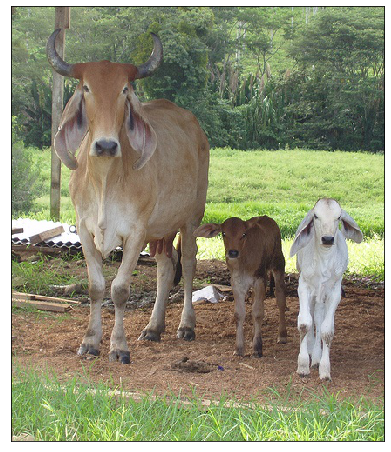

In [9]:
filename = '../torch/VOCdevkit/VOC2012/JPEGImages/2007_001299.jpg'
image = Image.open(filename)

print("Image shape:", (image.width, image.height))

display_image(image)

In [10]:
transform_pipeline = transforms.Compose([      
    transforms.ToTensor()
])

transformed_image = transform_pipeline(image)
transformed_image = torch.unsqueeze(transformed_image, dim=0)
transformed_image = transformed_image.to(device)
print("Transformed image shape:", transformed_image.shape)

Transformed image shape: torch.Size([1, 3, 500, 429])


In [11]:
out = model(transformed_image)

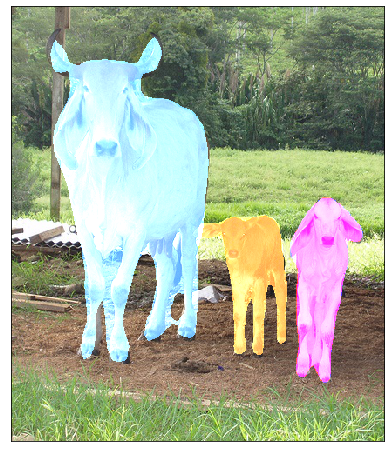

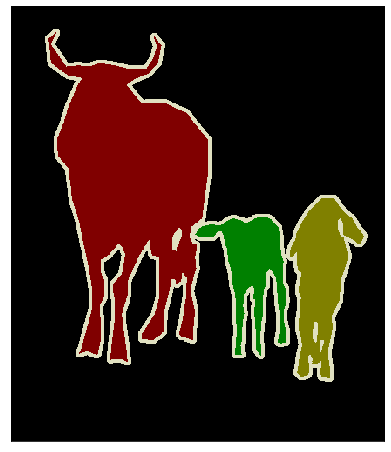

In [12]:
masks = get_masks(out)
instance_segmentation_plot(image, masks)

true_mask = Image.open('../torch/VOCdevkit/VOC2012/SegmentationObject/2007_001299.png')
display_image(true_mask)